In [20]:
import sys
from tqdm import tqdm_notebook as tqdm

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sys.path.append('../')
from tools.utils.visualizations import num_feature_comp_hist
from tools.utils.configs import load_configs
from tools.utils.features import load_features

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# re-load functions
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

## まずは target 毎の corr 見てみる

In [4]:
trn_df = pd.read_csv('../mnt/inputs/origin/train.csv.zip')

In [7]:
trn_df.set_index('ID_code', inplace=True)
trn_df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.

In [10]:
corrs_1 = trn_df.query('target == 1').drop('target', axis=1).corr()

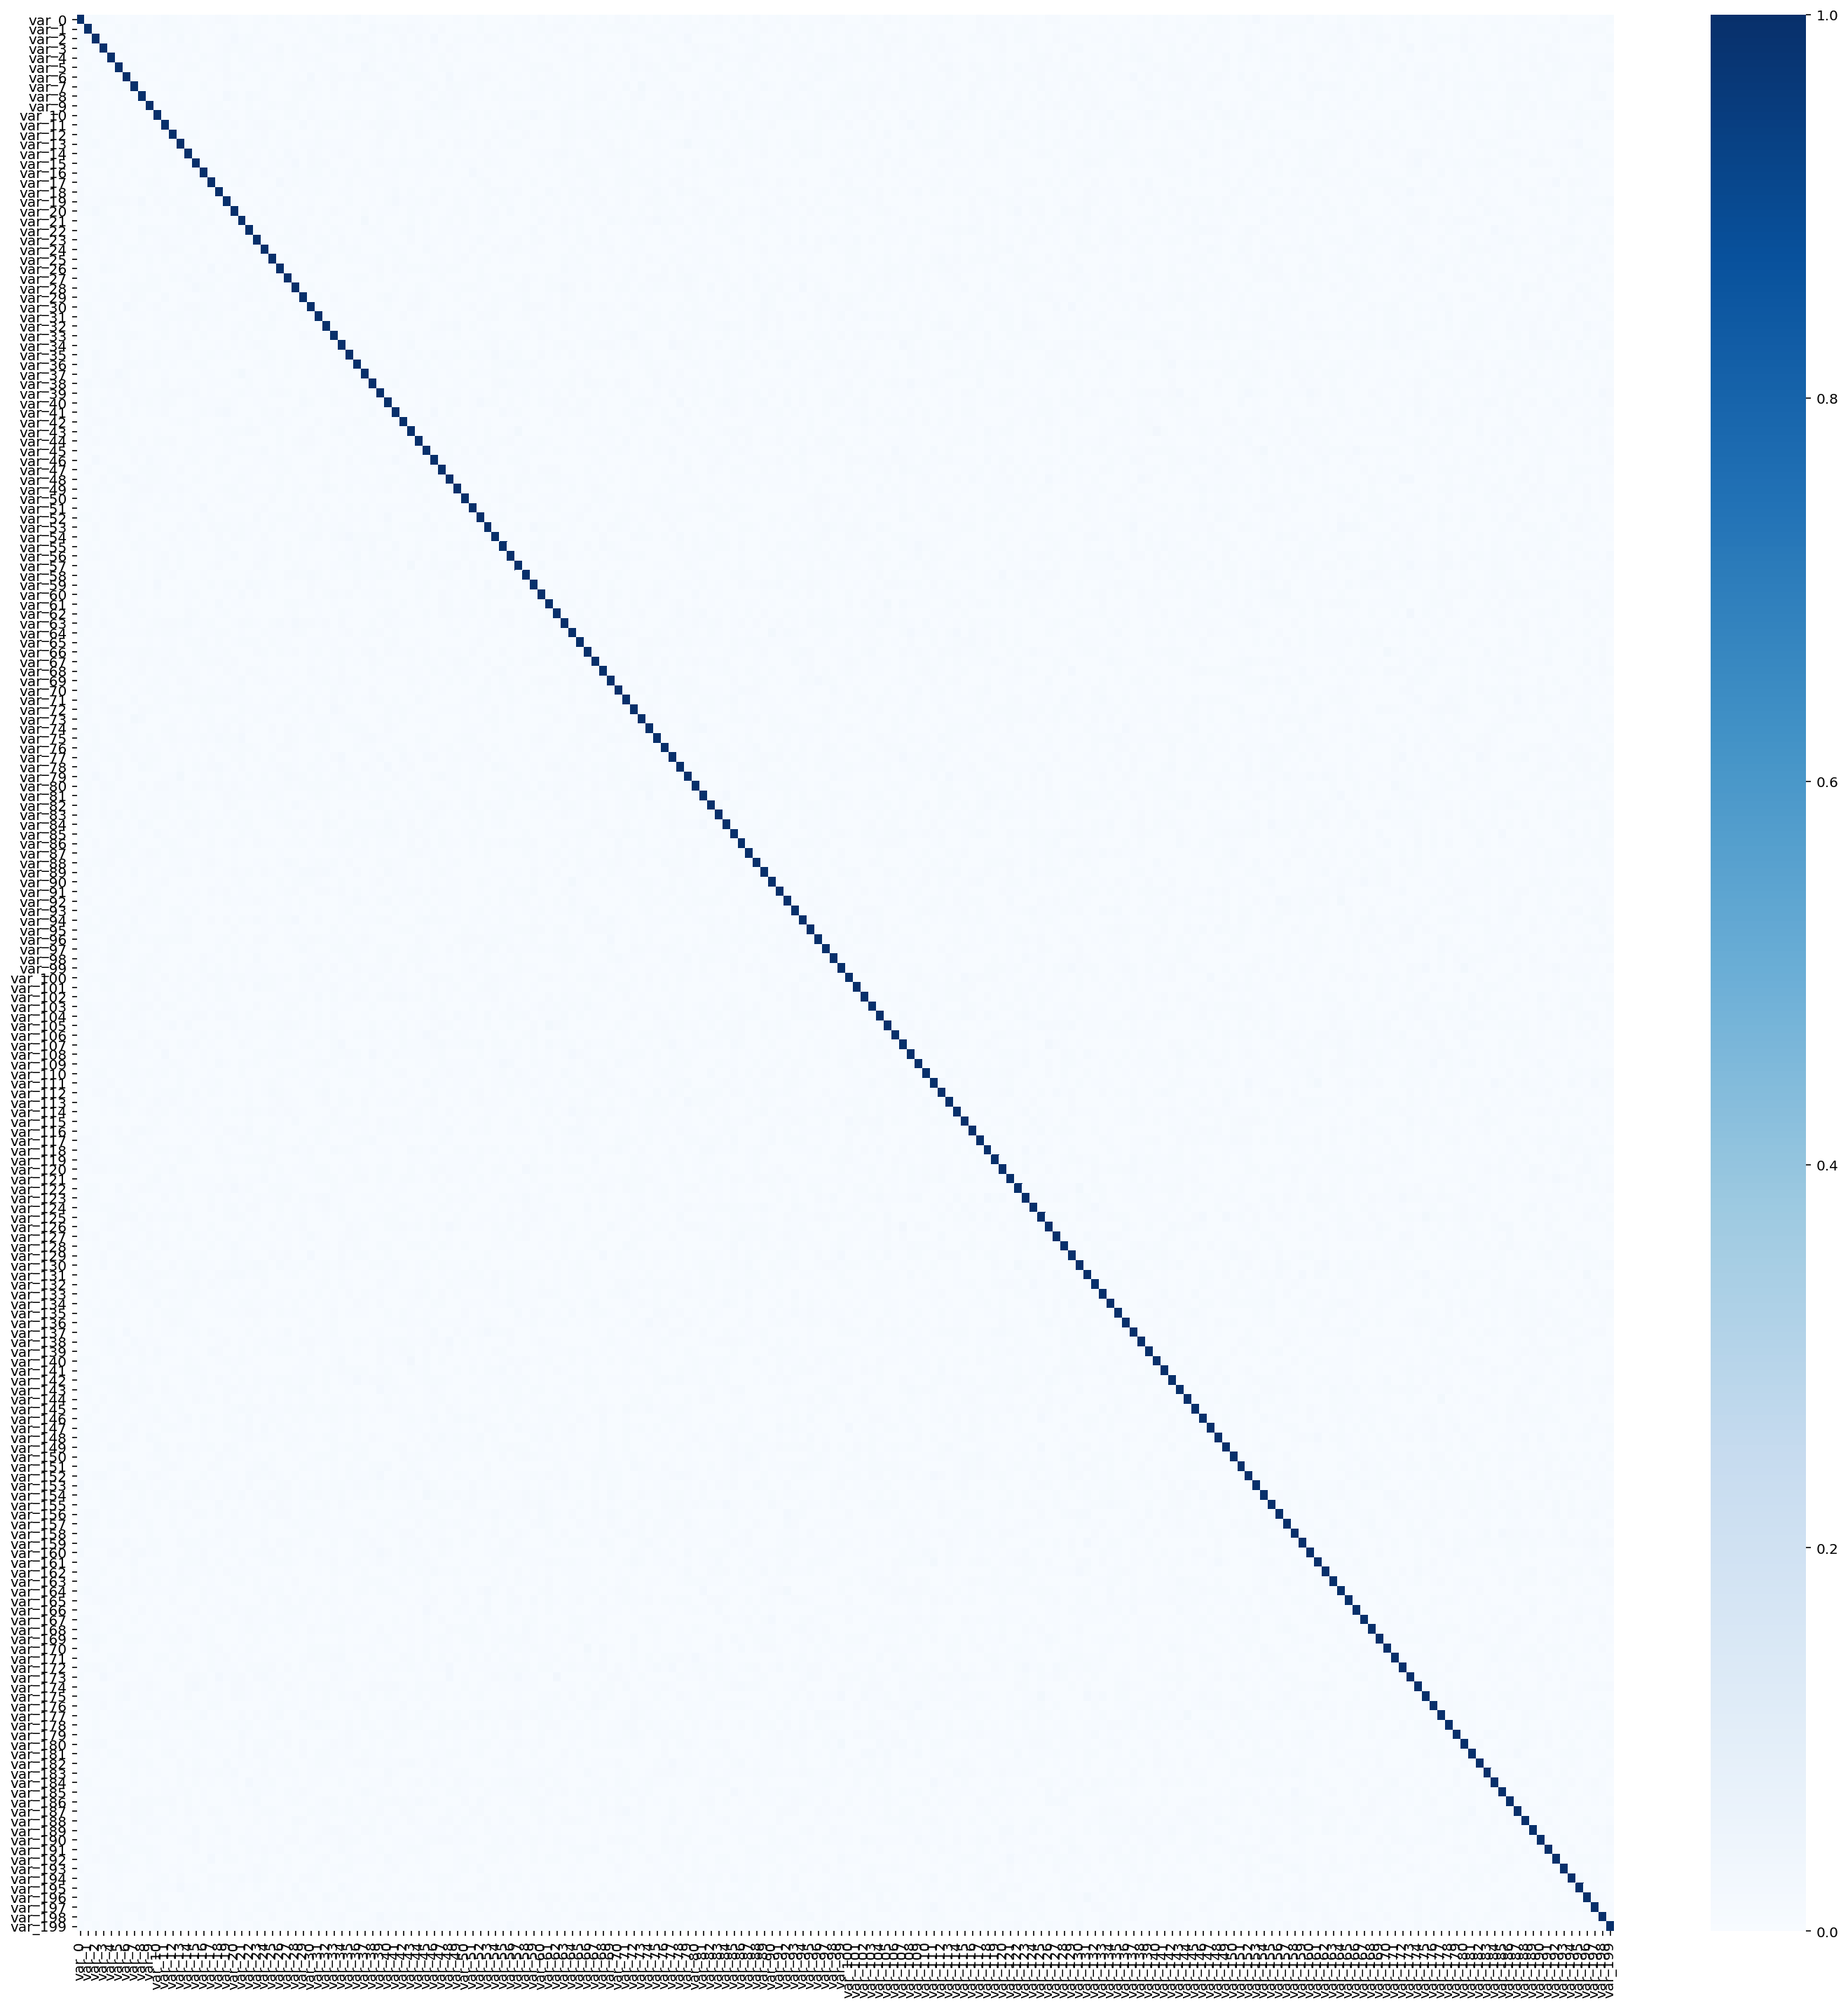

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(corrs_1.abs(), cmap=plt.cm.Blues, xticklabels=trn_df.drop('target', axis=1).columns.tolist(), yticklabels=trn_df.drop('target', axis=1).columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/corrs_1.png')

In [13]:
corrs_0 = trn_df.query('target == 0').drop('target', axis=1).corr()

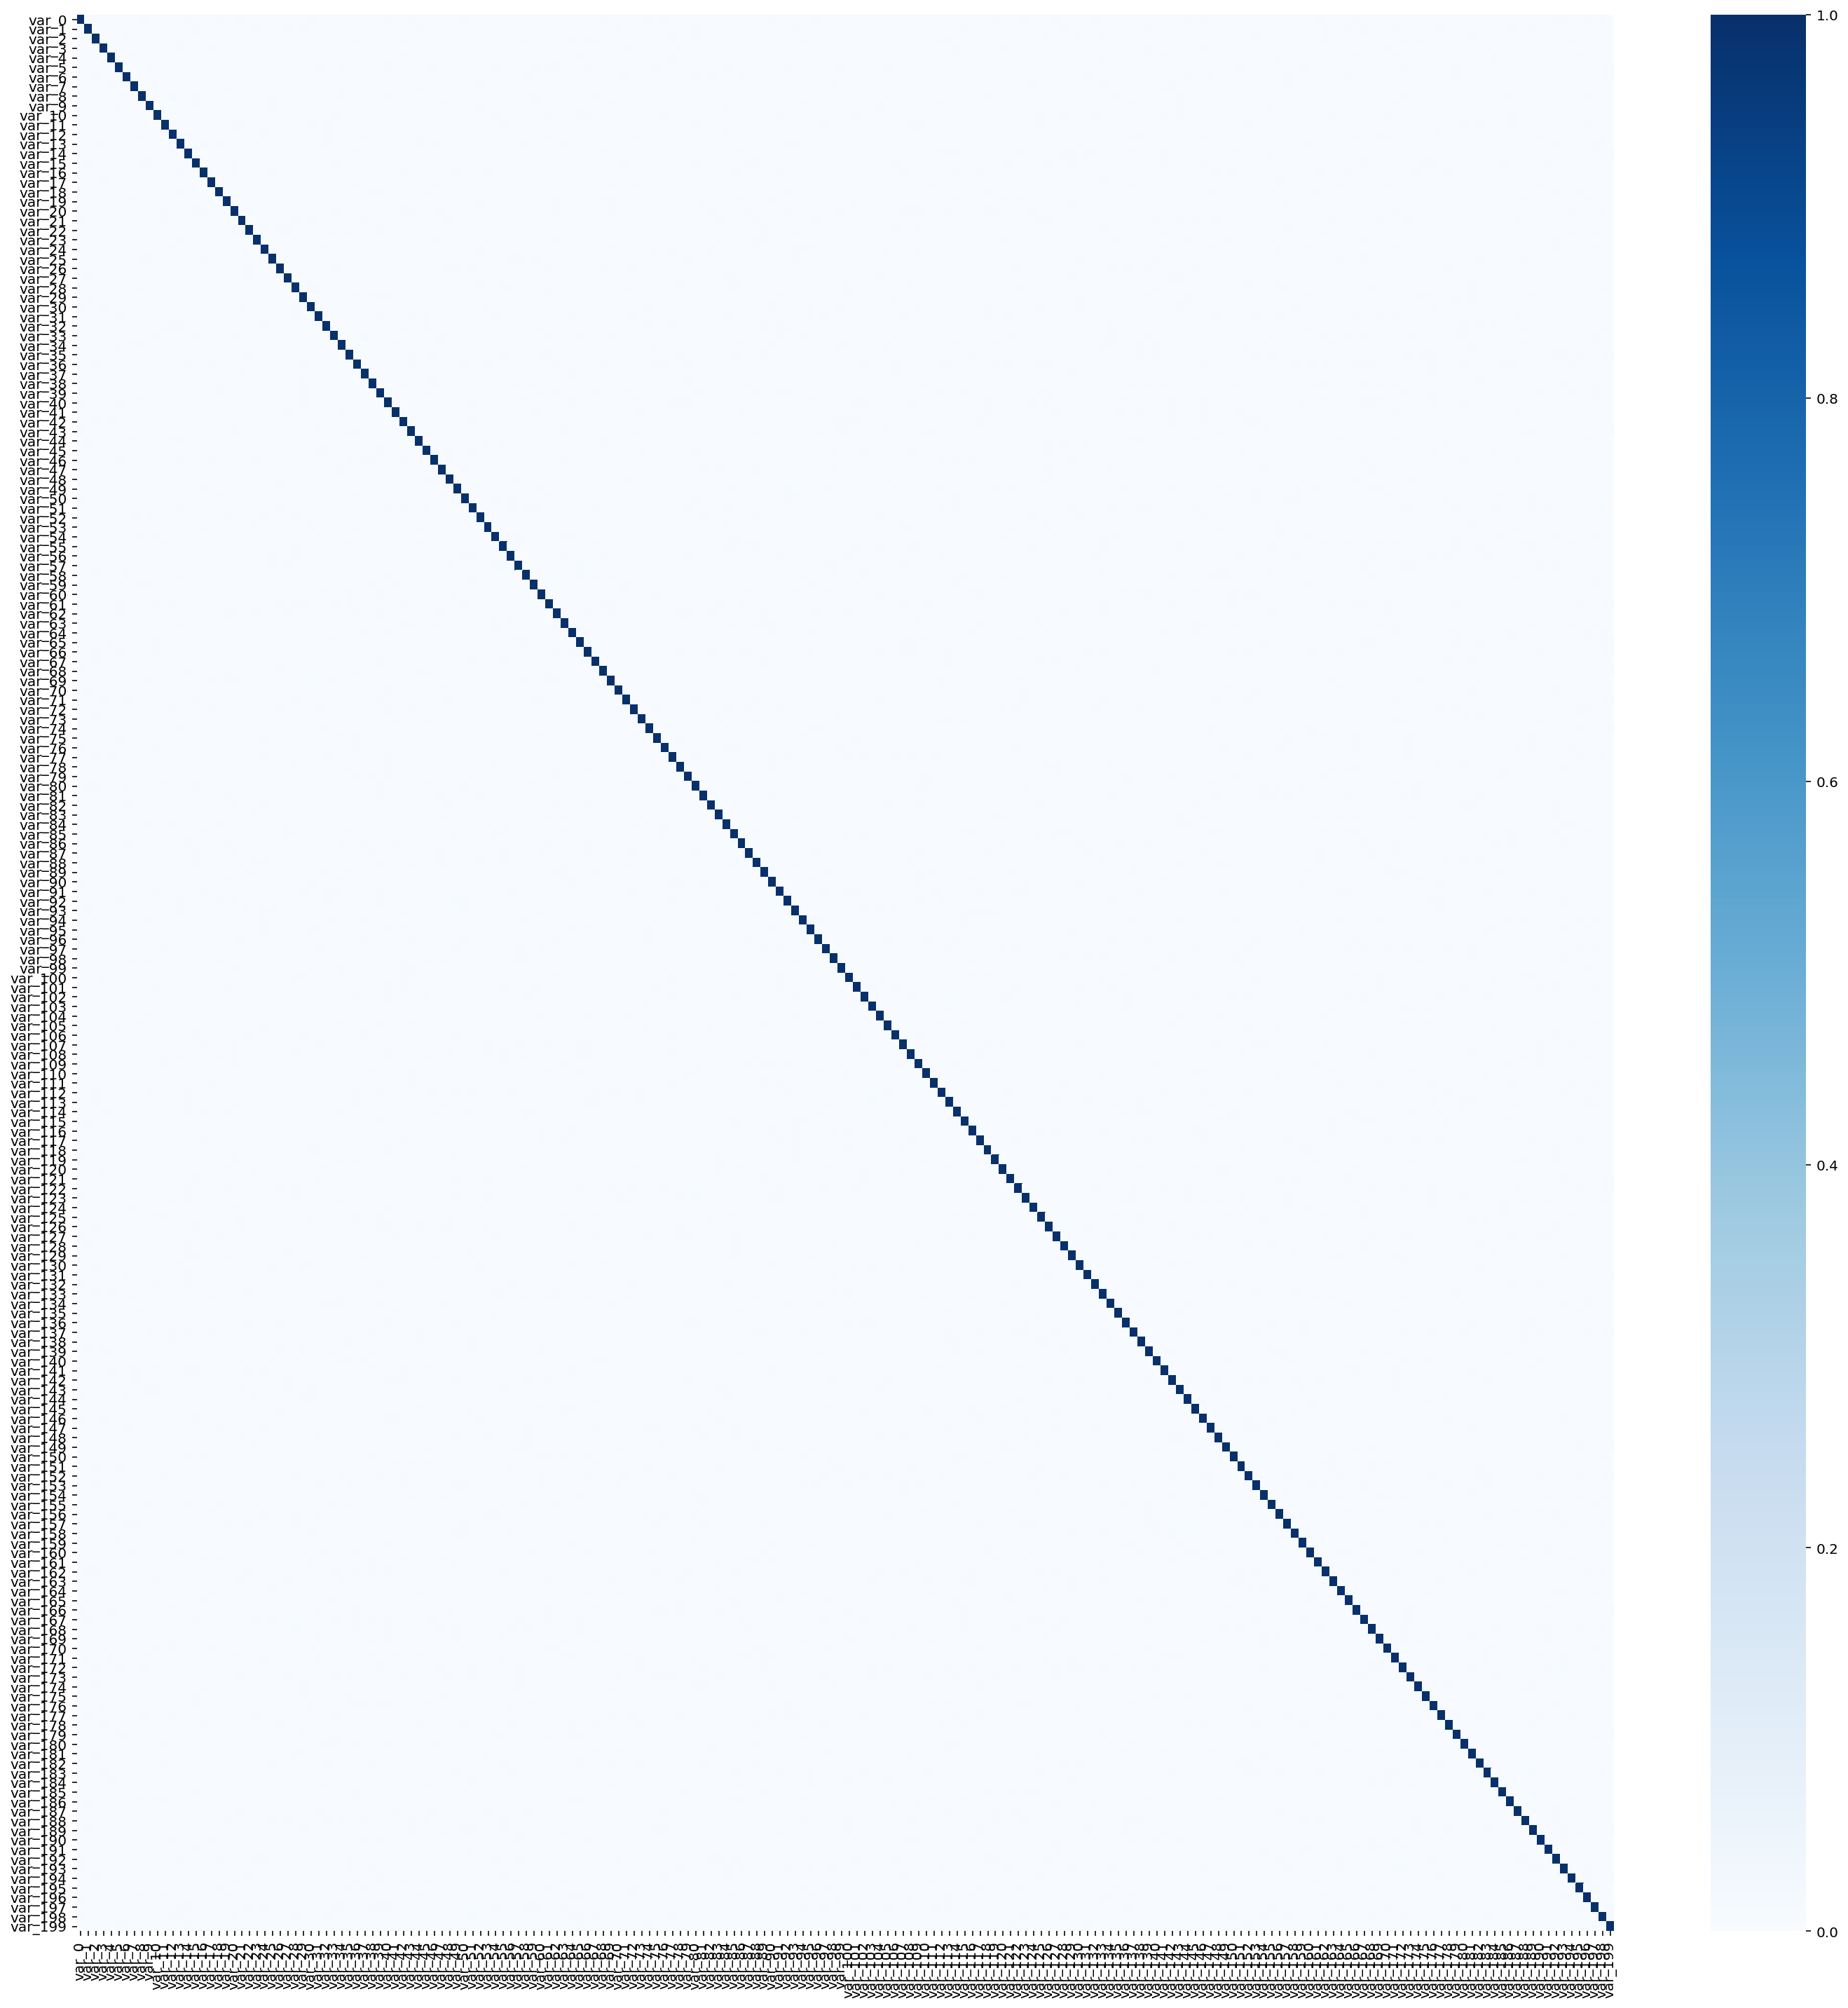

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(corrs_0.abs(), cmap=plt.cm.Blues, xticklabels=trn_df.drop('target', axis=1).columns.tolist(), yticklabels=trn_df.drop('target', axis=1).columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/corrs_0.png')

## f014, 021 の target visualize してみる

In [15]:
configs = load_configs('../configs/c036.yml')
features = load_features(configs['features'], '../mnt/inputs/features/')

USED_CONFIG: ../configs/c036.yml
configs: {'train': {'fold_num': 10, 'fold_type': 'skf', 'sampling_type': 'none', 'os_lim': 1000000, 'sampling_random_state': 71, 'pos_t': 0, 'neg_t': 0, 'single_model': False, 'all_features': False, 'feature_selection': False, 'feature_select_path': 'importances/', 'metric': 'split_cov', 'feature_topk': 150}, 'lgbm_params': {'boosting': 'gbdt', 'boost_from_average': False, 'verbose': -1, 'random_state': 71, 'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.01, 'num_leaves': 7, 'max_depth': -1, 'subsample': 0.4, 'bagging_freq': 5, 'colsample_bytree': 0.05, 'min_data_in_leaf': 60, 'min_sum_hessian_in_leaf': 10.0, 'lambda_l1': 0.1, 'min_data_per_group': 1, 'cat_smooth': 750, 'cat_l2': 100, 'max_cat_to_onehot': 10}, 'features': ['ID_code', 'f014_non_uniq_real_var_0', 'f014_non_uniq_real_var_1', 'f014_non_uniq_real_var_10', 'f014_non_uniq_real_var_100', 'f014_non_uniq_real_var_101', 'f014_non_uniq_real_var_102', 'f014_non_uniq_real_var_10

now concatenating the loaded features ... 
[load_features] done in 49.2 s


In [16]:
features.head()

,ID_code,f014_non_uniq_real_var_0,f014_non_uniq_real_var_1,f014_non_uniq_real_var_10,f014_non_uniq_real_var_100,f014_non_uniq_real_var_101,f014_non_uniq_real_var_102,f014_non_uniq_real_var_103,f014_non_uniq_real_var_104,f014_non_uniq_real_var_105,f014_non_uniq_real_var_106,f014_non_uniq_real_var_107,f014_non_uniq_real_var_108,f014_non_uniq_real_var_109,f014_non_uniq_real_var_11,f014_non_uniq_real_var_110,f014_non_uniq_real_var_111,f014_non_uniq_real_var_112,f014_non_uniq_real_var_113,f014_non_uniq_real_var_114,f014_non_uniq_real_var_115,f014_non_uniq_real_var_116,f014_non_uniq_real_var_117,f014_non_uniq_real_var_118,f014_non_uniq_real_var_119,f014_non_uniq_real_var_12,f014_non_uniq_real_var_120,f014_non_uniq_real_var_121,f014_non_uniq_real_var_122,f014_non_uniq_real_var_123,f014_non_uniq_real_var_124,f014_non_uniq_real_var_125,f014_non_uniq_real_var_126,f014_non_uniq_real_var_127,f014_non_uniq_real_var_128,f014_non_uniq_real_var_129,f014_non_uniq_real_var_13,f014_non_uniq_real_var_130,f014_non_uniq_real_var_131,f014_non_uniq_real_var_132,f014_non_uniq_real_var_133,f014_non_uniq_real_var_134,f014_non_uniq_real_var_135,f014_non_uniq_real_var_136,f014_non_uniq_real_var_137,f014_non_uniq_real_var_138,f014_non_uniq_real_var_139,f014_non_uniq_real_var_14,f014_non_uniq_real_var_140,f014_non_uniq_real_var_141,f014_non_uniq_real_var_142,f014_non_uniq_real_var_143,f014_non_uniq_real_var_144,f014_non_uniq_real_var_145,f014_non_uniq_real_var_146,f014_non_uniq_real_var_147,f014_non_uniq_real_var_148,f014_non_uniq_real_var_149,f014_non_uniq_real_var_15,f014_non_uniq_real_var_150,f014_non_uniq_real_var_151,f014_non_uniq_real_var_152,f014_non_uniq_real_var_153,f014_non_uniq_real_var_154,f014_non_uniq_real_var_155,f014_non_uniq_real_var_156,f014_non_uniq_real_var_157,f014_non_uniq_real_var_158,f014_non_uniq_real_var_159,f014_non_uniq_real_var_16,f014_non_uniq_real_var_160,f014_non_uniq_real_var_161,f014_non_uniq_real_var_162,f014_non_uniq_real_var_163,f014_non_uniq_real_var_164,f014_non_uniq_real_var_165,f014_non_uniq_real_var_166,f014_non_uniq_real_var_167,f014_non_uniq_real_var_168,f014_non_uniq_real_var_169,f014_non_uniq_real_var_17,f014_non_uniq_real_var_170,f014_non_uniq_real_var_171,f014_non_uniq_real_var_172,f014_non_uniq_real_var_173,f014_non_uniq_real_var_174,f014_non_uniq_real_var_175,f014_non_uniq_real_var_176,f014_non_uniq_real_var_177,f014_non_uniq_real_var_178,f014_non_uniq_real_var_179,f014_non_uniq_real_var_18,f014_non_uniq_real_var_180,f014_non_uniq_real_var_181,f014_non_uniq_real_var_182,f014_non_uniq_real_var_183,f014_non_uniq_real_var_184,f014_non_uniq_real_var_185,f014_non_uniq_real_var_186,f014_non_uniq_real_var_187,f014_non_uniq_real_var_188,f014_non_uniq_real_var_189,f014_non_uniq_real_var_19,f014_non_uniq_real_var_190,f014_non_uniq_real_var_191,f014_non_uniq_real_var_192,f014_non_uniq_real_var_193,f014_non_uniq_real_var_194,f014_non_uniq_real_var_195,f014_non_uniq_real_var_196,f014_non_uniq_real_var_197,f014_non_uniq_real_var_198,f014_non_uniq_real_var_199,f014_non_uniq_real_var_2,f014_non_uniq_real_var_20,f014_non_uniq_real_var_21,f014_non_uniq_real_var_22,f014_non_uniq_real_var_23,f014_non_uniq_real_var_24,f014_non_uniq_real_var_25,f014_non_uniq_real_var_26,f014_non_uniq_real_var_27,f014_non_uniq_real_var_28,f014_non_uniq_real_var_29,f014_non_uniq_real_var_3,f014_non_uniq_real_var_30,f014_non_uniq_real_var_31,f014_non_uniq_real_var_32,f014_non_uniq_real_var_33,f014_non_uniq_real_var_34,f014_non_uniq_real_var_35,f014_non_uniq_real_var_36,f014_non_uniq_real_var_37,f014_non_uniq_real_var_38,f014_non_uniq_real_var_39,f014_non_uniq_real_var_4,f014_non_uniq_real_var_40,f014_non_uniq_real_var_41,f014_non_uniq_real_var_42,f014_non_uniq_real_var_43,f014_non_uniq_real_var_44,f014_non_uniq_real_var_45,f014_non_uniq_real_var_46,f014_non_uniq_real_var_47,f014_non_uniq_real_var_48,f014_non_uniq_real_var_49,f014_non_uniq_real_var_5,f014_non_uniq_real_var_50,f014_non_uniq_real_var_51,f014_non_uniq_real_var_52,f014_non_uniq_real_var_

## oof と target の分布見てみる

In [4]:
ls ../mnt/blendings/1st/

400V_0.9231376.csv
e071_e036_t006_w_pair_augmentation_7_7_2019-04-05-17-35-24_0.92357_oofs.csv
e071_e036_t006_w_pair_augmentation_7_7_2019-04-05-17-35-24_0.92357_sub_no_rank_fixed.csv
nagiss_01_oof_CV_92065_LB_921.csv
nagiss_01_submission_CV_92065_LB_921.csv
oof_ra_x002_lgb_F1200_05.04.2019-11_33_roc0.923105_thr0.4014114.csv
oof_vicens_0.9231376.csv
sub_pa_x002_lgb_F1200_05.04.2019-11_33__0.923105_MCC0.596.csv


In [18]:
ls ../mnt/inputs/nes_info

fake_ids.pkl.gz                    target_w_fakes.pkl.gz
private_LB.npz.npy                 trn_ID_code.pkl.gz
public_LB.npz.npy                  trn_ID_code_w_fakes.pkl.gz
real_samples_indexes.npz.npy       trn_real_samples_indexes.npz.npy
synthetic_samples_indexes.npz.npy  trn_synthetic_samples_indexes.npz.npy
target.pkl.gz                      tst_ID_code.pkl.gz


In [21]:
reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')

In [5]:
guchio_oof = pd.read_csv('../mnt/blendings/1st/e071_e036_t006_w_pair_augmentation_7_7_2019-04-05-17-35-24_0.92357_oofs.csv')
guchio_sub = pd.read_csv('../mnt/blendings/1st/e071_e036_t006_w_pair_augmentation_7_7_2019-04-05-17-35-24_0.92357_sub_no_rank_fixed.csv')
nagiss_oof = pd.read_csv('../mnt/blendings/1st/nagiss_01_oof_CV_92065_LB_921.csv')
nagiss_sub = pd.read_csv('../mnt/blendings/1st/nagiss_01_submission_CV_92065_LB_921.csv')
vicens_oof = pd.read_csv('../mnt/blendings/1st/oof_vicens_0.9231376.csv')
vicens_sub = pd.read_csv('../mnt/blendings/1st/400V_0.9231376.csv')
graseck_oof = pd.read_csv('../mnt/blendings/1st/oof_ra_x002_lgb_F1200_05.04.2019-11_33_roc0.923105_thr0.4014114.csv')
graseck_sub = pd.read_csv('../mnt/blendings/1st/sub_pa_x002_lgb_F1200_05.04.2019-11_33__0.923105_MCC0.596.csv')

In [9]:
guchio_oof.head()

,ID_code,y_val,oof_proba
0,train_0,0,0.000981
1,train_1,0,0.315450
2,train_2,0,0.005801
3,train_3,0,0.053780
4,train_4,0,0.077272


In [25]:
graseck_sub = graseck_sub.set_index('ID_code').loc[guchio_sub.ID_code.values].reset_index()
graseck_sub.head()

,ID_code,target
0,test_0,0.000000
1,test_1,0.000000
2,test_2,0.000000
3,test_3,0.133973
4,test_4,0.000000


In [26]:
graseck_sub.tail()

,ID_code,target
199995,test_199995,0.056661
199996,test_199996,0.010649
199997,test_199997,0.000000
199998,test_199998,0.000000
199999,test_199999,0.039245


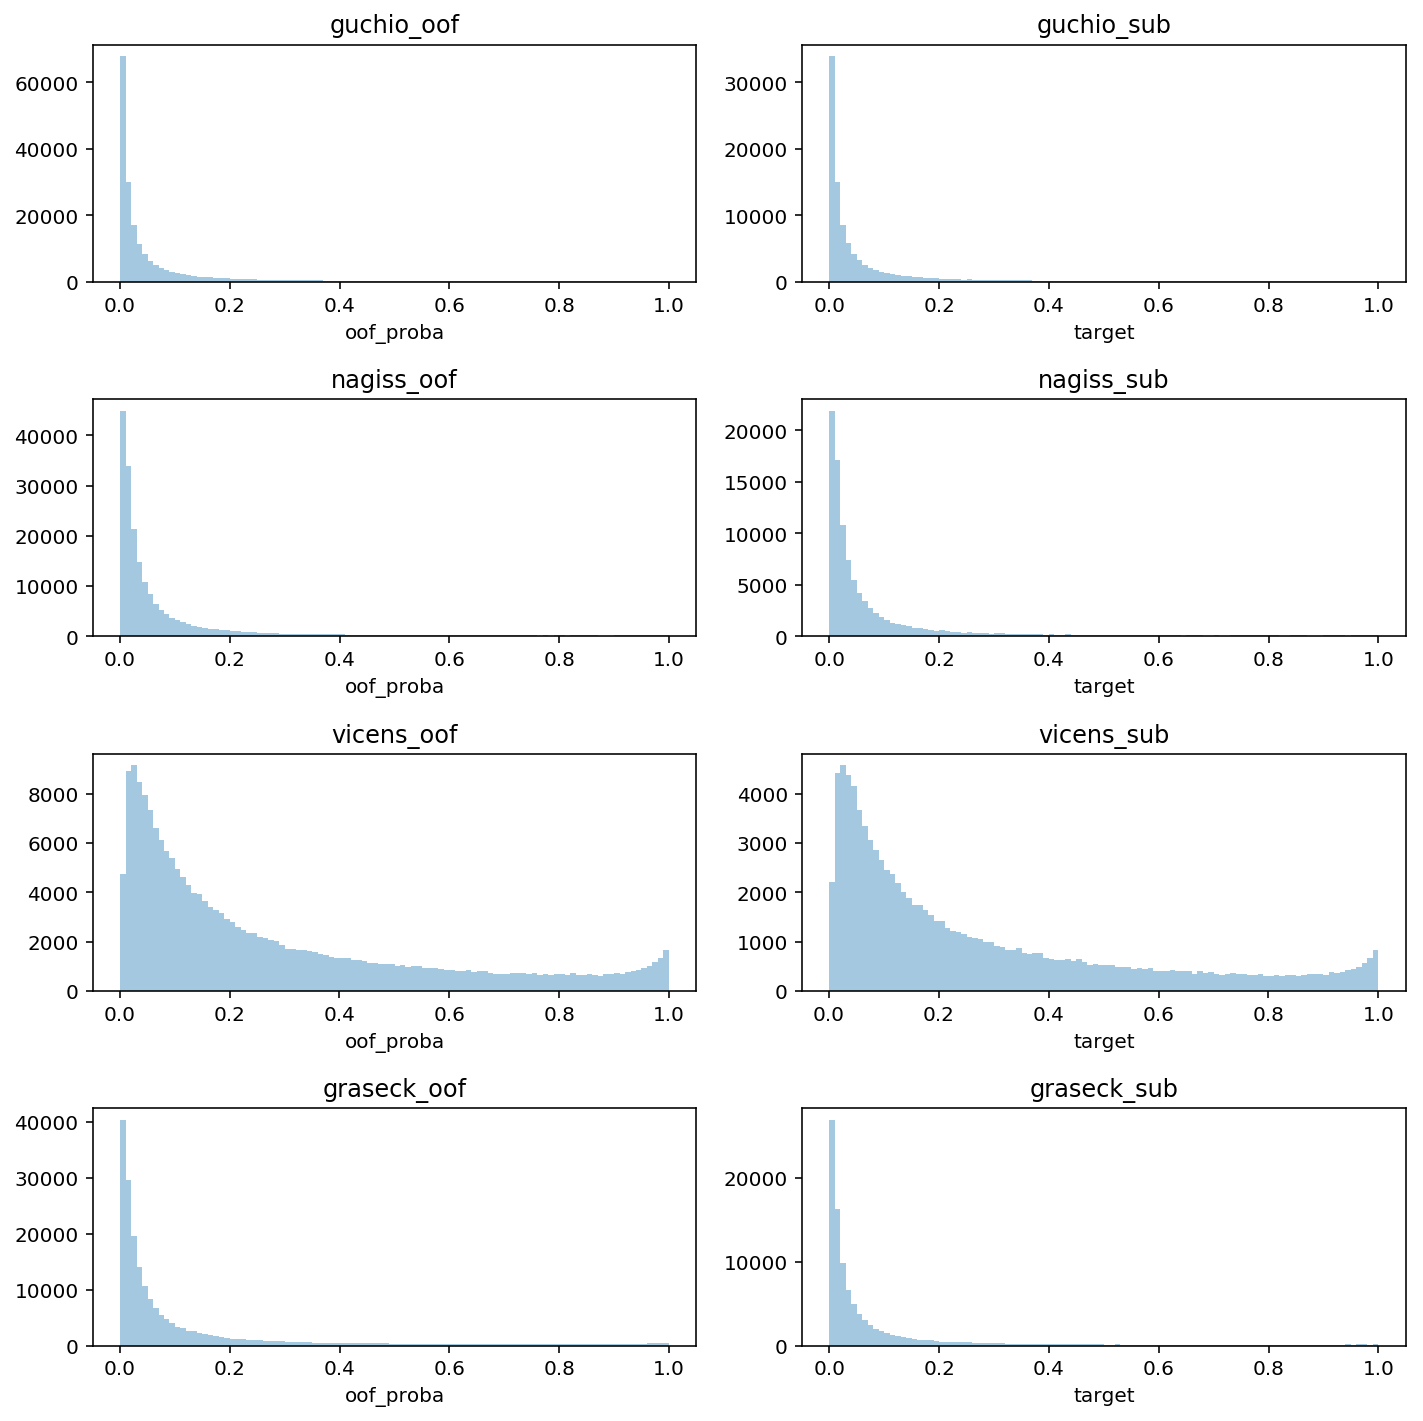

In [27]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
# guchio
ax = axs[0, 0]
ax.set_title('guchio_oof')
sns.distplot(guchio_oof.oof_proba, kde=False, ax=ax, bins=100)
ax = axs[0, 1]
ax.set_title('guchio_sub')
sns.distplot(guchio_sub.iloc[reals].target, kde=False, ax=ax, bins=100)

# nagiss
ax = axs[1, 0]
ax.set_title('nagiss_oof')
sns.distplot(nagiss_oof.oof_proba, kde=False, ax=ax, bins=100)
ax = axs[1, 1]
ax.set_title('nagiss_sub')
sns.distplot(nagiss_sub.iloc[reals].target, kde=False, ax=ax, bins=100)

# vicens
ax = axs[2, 0]
ax.set_title('vicens_oof')
sns.distplot(vicens_oof.oof_proba, kde=False, ax=ax, bins=100)
ax = axs[2, 1]
ax.set_title('vicens_sub')
sns.distplot(vicens_sub.iloc[reals].target, kde=False, ax=ax, bins=100)

# graseck
ax = axs[3, 0]
ax.set_title('graseck_oof')
sns.distplot(graseck_oof.oof_proba, kde=False, ax=ax, bins=100)
ax = axs[3, 1]
ax.set_title('graseck_sub')
sns.distplot(graseck_sub.iloc[reals].target, kde=False, ax=ax, bins=100)

plt.tight_layout()

In [31]:
guchio_oof[['y_val', 'oof_proba']] / guchio_oof[['y_val', 'oof_proba']].nunique()

,y_val,oof_proba
0,0.0,4.906907e-09
1,0.0,1.577249e-06
2,0.0,2.900367e-08
3,0.0,2.689001e-07
4,0.0,3.863595e-07
5,0.0,1.017673e-07
6,0.0,9.368840e-07
7,0.0,4.118450e-08
8,0.0,4.024733e-07
9,0.0,3.533935e-08
